In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# RegressionLogistique
from sklearn.linear_model import LogisticRegression
import seaborn as sns
# RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier

## Parie I : Importation et préparation des données

In [2]:
# Importation des données
meta = pd.read_csv("metadata.csv")
test = pd.read_csv("test.csv")
train= pd.read_csv("train.csv")

In [3]:
print(train.shape)

(4299, 44)


In [4]:
train.describe()
# train.info()

,id,year,month,pers_a_charge,REVENUS,CHARGES,CREDITS,RAV_ouverture,nb_credits,nb_amort,nb_renouv,nb_immo,nb_rac,nb_autres,nb_decouvert
count,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000
mean,3942.141893,2016.253315,6.503140,0.766457,2235.039079,1049.102117,1022.980228,162.956734,4.906722,2.059084,2.319377,0.216795,0.063038,0.166783,0.053036
std,2275.932687,1.676150,3.554754,1.167212,1145.626852,574.669370,1024.338737,859.169648,4.134928,2.223075,2.902899,0.543147,0.257017,0.644159,0.258817
min,1.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-14831.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1954.000000,2015.000000,3.000000,0.000000,1450.000000,711.500000,378.000000,-122.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3927.000000,2016.000000,6.000000,0.000000,2004.000000,987.000000,740.000000,218.000000,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,5903.500000,2018.000000,10.000000,1.000000,2820.000000,1316.000000,1369.000000,546.000000,6.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7917.000000,2019.000000,12.000000,9.000000,17600.000000,8295.000000,16917.000000,11037.000000,78.000000,27.000000,72.000000,6.000000,3.000000,16.000000,4.000000


In [5]:
train = train.replace({'\\N':np.NaN})
train = train.replace({'Non Renseigne':np.NaN})
# train = train.astype('float')

test = test.replace({'\\N':np.NaN})
test = test.replace({'Non Renseigne':np.NaN})

In [6]:
train.columns

Index(['id', 'STRUCTURE PRESCRIPTRICE', 'PLATEFORME', 'year', 'month',
       'region', 'ORIENTATION', 'NATURE_DIFF', 'age', 'tranche_age',
       'situation', 'adulte_foyer', 'pers_a_charge', 'PROF', 'LOGEMENT',
       'REVENUS', 'cat_rev', 'CHARGES', 'cat_charges', 'CREDITS', 'cat_credit',
       'IMPAYES_DEBUT', 'cat_impayes', 'RAV_ouverture', 'cat_RAV_ouverture',
       'RAV_UC', 'cat_RAV_UC', 'nb_credits', 'CRD', 'gain_mediation',
       'nb_amort', 'crd_amort', 'nb_renouv', 'crd_renouv', 'nb_immo',
       'crd_immo', 'nb_rac', 'crd_rac', 'nb_autres', 'crd_autres',
       'nb_decouvert', 'crd_decouvert', 'moy_eco_jour', 'cat_moy_eco_jour'],
      dtype='object')

In [7]:
# les colonnes supprimées

train  = train.drop(['id','year','STRUCTURE PRESCRIPTRICE','tranche_age','pers_a_charge','IMPAYES_DEBUT', 'cat_impayes','cat_RAV_ouverture',
                     'RAV_UC', 'cat_RAV_UC','gain_mediation','crd_immo','crd_rac','nb_autres', 'crd_autres',
                     'moy_eco_jour',
                    'nb_immo','nb_rac','crd_decouvert', 'CRD'], axis=1)

test  = test.drop(['id','year','STRUCTURE PRESCRIPTRICE','tranche_age','pers_a_charge','IMPAYES_DEBUT', 'cat_impayes','cat_RAV_ouverture',
       'RAV_UC', 'cat_RAV_UC','gain_mediation','crd_immo','crd_rac','nb_autres', 'crd_autres',
                     'moy_eco_jour','nb_immo','nb_rac','crd_decouvert', 'CRD'], axis=1)

train.head(5)

,PLATEFORME,month,region,ORIENTATION,NATURE_DIFF,age,situation,adulte_foyer,PROF,LOGEMENT,...,CREDITS,cat_credit,RAV_ouverture,nb_credits,nb_amort,crd_amort,nb_renouv,crd_renouv,nb_decouvert,cat_moy_eco_jour
0,bancaire,7,BOURGOGNE FRANCHE COMTE,Surendettement,Surendettement,NaN,celibataire,1,retraité,proprietaire,...,469,1€-499€,76,3,3,11600,0,NaN,0,"0a2,99€"
1,bancaire,2,OCCITANIE,Mediation,Endettement,NaN,marie,2,retraité,gratuit,...,1900,1501€-2000€,-199,9,6,30817,3,14021,0,Négatif
2,social,4,PROVENCE-ALPES-COTE-D'AZUR,Accompagnement,Endettement,NaN,celibataire,1,employé,locataire,...,181,1€-499€,213,2,0,NaN,1,1700,0,Négatif
3,bancaire,11,BRETAGNE,Mediation,Multiendettement,NaN,divorce,1,retraité,proprietaire,...,568,500€-1000€,887,4,2,11000,2,1750,0,15€et+
4,social,9,NOUVELLE AQUITAINE,Accompagnement,Difficultés de Gestion,24,concubinage,2,employé,locataire,...,485,1€-499€,233,4,2,13137,2,1200,0,Négatif


In [8]:
# remplacer les NaN par 0
train['crd_amort'] = train['crd_amort'].fillna(0)
train['crd_renouv'] = train['crd_renouv'].fillna(0)
#train['age'] = train['age'].fillna(0)

#test['age'] = test['age'].fillna(0)
test['crd_amort'] = test['crd_amort'].fillna(0)
test['crd_renouv'] = test['crd_renouv'].fillna(0)

In [9]:
train.head()

,PLATEFORME,month,region,ORIENTATION,NATURE_DIFF,age,situation,adulte_foyer,PROF,LOGEMENT,...,CREDITS,cat_credit,RAV_ouverture,nb_credits,nb_amort,crd_amort,nb_renouv,crd_renouv,nb_decouvert,cat_moy_eco_jour
0,bancaire,7,BOURGOGNE FRANCHE COMTE,Surendettement,Surendettement,NaN,celibataire,1,retraité,proprietaire,...,469,1€-499€,76,3,3,11600,0,0,0,"0a2,99€"
1,bancaire,2,OCCITANIE,Mediation,Endettement,NaN,marie,2,retraité,gratuit,...,1900,1501€-2000€,-199,9,6,30817,3,14021,0,Négatif
2,social,4,PROVENCE-ALPES-COTE-D'AZUR,Accompagnement,Endettement,NaN,celibataire,1,employé,locataire,...,181,1€-499€,213,2,0,0,1,1700,0,Négatif
3,bancaire,11,BRETAGNE,Mediation,Multiendettement,NaN,divorce,1,retraité,proprietaire,...,568,500€-1000€,887,4,2,11000,2,1750,0,15€et+
4,social,9,NOUVELLE AQUITAINE,Accompagnement,Difficultés de Gestion,24,concubinage,2,employé,locataire,...,485,1€-499€,233,4,2,13137,2,1200,0,Négatif


In [10]:
# remplacer les valuers des bancaire et social
train['PLATEFORME'] = train['PLATEFORME'].replace(['bancaire', 'social'], [1,0])

train['region'] = train['region'].replace(['ILE-DE-FRANCE','GRAND EST','HAUTS DE France','AUVERGNE RHONE ALPES','NOUVELLE AQUITAINE','OCCITANIE','PROVENCE-ALPES-COTE-D\'AZUR','NORMANDIE','PAYS DE LA LOIRE','CENTRE','BOURGOGNE FRANCHE COMTE','BRETAGNE','DOM','CORSE','MONACO','ALLEMAGNE'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0])
#train['ORIENTATION'] = train['ORIENTATION'].replace(['Surendettement','Accompagnement','Mediation','Aucune','Autres Procédures Collectives','Microcredit'],[0,1,2,3,4,5])

train['NATURE_DIFF'] = train['NATURE_DIFF'].replace(['Endettement','Surendettement','Difficultés de Gestion','Accident de la vie','Mauvaise gestion','Impayés','Réaménagement',
'Cessation Paiement','Multiendettement','Crédits renouvelables récurrents', 'Mal-endettement','Pré-endettement','Microcrédit Personnel','Professionnel','Redressement Judiciaire','Sur-endettement', 'Procédures collectives','Assurance','Report d\'échéance'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])


train['situation'] = train['situation'].replace(['marie','celibataire','divorce','concubinage','veuf','pacs'],[0,1,2,3,4,5])

#train['PROF'] = train['PROF'].replace(['employé','retraité','fonctionnaire','chomeur','autre','cadre','pro','cadrefonctionnaire'],[0,1,2,3,4,5,6,7])
train['LOGEMENT'] = train['LOGEMENT'].replace(['locataire','proprietaire','gratuit'], [0,1,2])


train['cat_charges'] = train['cat_charges'].replace(['500€-1000€','1001€-1500€','<500€','1501€-2000€','2001€-2500€','2501€-3000€','3001€-3500€','5001€ et +','3501€-4000€','4001€-4500€'],[750,1250,500,1750,2250,2750,3250,5000,3750,4250])
train['cat_credit'] = train['cat_credit'].replace(['1€-499€','500€-1000€','1000€-1500€','1501€-2000€','2001€-2500€','2501€-3000€','3001€-3500€','3501€-4000€','5001€ et +','4001€-4500€','0€ /aucun ','4501€-5000€'],[250,750,1250,1750,2250,2750,3250,3750,5000,4250,0,2750])
train['cat_rev'] = train['cat_rev'].replace(['1501€-2000€','2001€-2500€','1150€-1500€','2501€-3000€','<1150€',
                                            '3001€-3500€','3501€-4000€','4001€-4500€','5001€ et +','4501€-5000€','Non renseigne'], 
                                           [1750,2250,1325,2750,1200,3250,3750,4250,5002,4750,1500])

train['cat_credit'] = train['cat_credit'].replace(['0€ /aucun'], [0])
#train['CRD'] = train['CRD'].replace([','], ['.'])
#train['tranche_age'] = train['tranche_age'].replace(['45-54ans','40-44ans','55-64ans','65-75ans','35-34ans','75ans_et+','<25ans'],[50,42,60,68,34,75,25])
train['cat_moy_eco_jour'] = test['cat_moy_eco_jour'].replace(['Négatif','3a5,99€','6a9,99€','0a2,99€','15€et+','10a14,99€'], [-1,5,9,2,16,13])

In [11]:
test['PLATEFORME'] = test['PLATEFORME'].replace(['bancaire', 'social'], [1,0])
test['region'] = test['region'].replace(['ILE-DE-FRANCE','GRAND EST','HAUTS DE France','AUVERGNE RHONE ALPES',
                         'NOUVELLE AQUITAINE','OCCITANIE','PROVENCE-ALPES-COTE-D\'AZUR','NORMANDIE',
                         'PAYS DE LA LOIRE','CENTRE','BOURGOGNE FRANCHE COMTE','BRETAGNE','DOM','CORSE','MONACO','ALLEMAGNE'], 
                       [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0])
test['NATURE_DIFF'] = test['NATURE_DIFF'].replace(['Endettement','Surendettement','Difficultés de Gestion','Accident de la vie','Mauvaise gestion','Impayés','Réaménagement',
'Cessation Paiement','Multiendettement','Crédits renouvelables récurrents', 'Mal-endettement',
'Pré-endettement', 'Microcrédit Personnel', 'Professionnel','Redressement Judiciaire','Sur-endettement', 'Procédures collectives',
'Assurance','Report d\'échéance'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
test['situation'] = test['situation'].replace(['marie','celibataire','divorce','concubinage','veuf','pacs'],[0,1,2,3,4,5])

#test['PROF'] = test['PROF'].replace(['employé','retraité','fonctionnaire','chomeur','autre','cadre','pro','cadrefonctionnaire'],[0,1,2,3,4,5,6,7])
test['LOGEMENT'] = test['LOGEMENT'].replace(['locataire','proprietaire','gratuit'], [0,1,2])
test['cat_charges'] =test['cat_charges'].replace(['500€-1000€','1001€-1500€','<500€','1501€-2000€','2001€-2500€','2501€-3000€','3001€-3500€','5001€ et +','3501€-4000€','4001€-4500€'],
                            [750,1250,500,1750,2250,2750,3250,5000,3750,4250])
test['cat_credit'] = test['cat_credit'].replace(['1€-499€','500€-1000€','1000€-1500€','1501€-2000€','2001€-2500€','2501€-3000€','3001€-3500€','3501€-4000€',
'5001€ et +','4001€-4500€','0€ /aucun ','4501€-5000€'],
                           [250,750,1250,1750,2250,2750,3250,3750,5000,4250,0,2750])
test['cat_rev'] = test['cat_rev'].replace(['1501€-2000€','2001€-2500€','1150€-1500€','2501€-3000€','<1150€',
                                            '3001€-3500€','3501€-4000€','4001€-4500€','5001€ et +','4501€-5000€','Non renseigne'], 
                                           [1750,2250,1325,2750,1200,3250,3750,4250,5002,4750,1500])
test['cat_credit'] = test['cat_credit'].replace(['0€ /aucun'], [0])

test['cat_moy_eco_jour'] = test['cat_moy_eco_jour'].replace(['Négatif','3a5,99€','6a9,99€','0a2,99€','15€et+','10a14,99€'], [-1,5,9,2,16,13])
#test['CRD'] = test['CRD'].replace([','], ['.'])
#test['tranche_age'] = test['tranche_age'].replace(['45-54ans','40-44ans','55-64ans','65-75ans','35-34ans','75ans_et+','<25ans'],[50,42,60,68,34,75,25])

In [12]:
train.head()

,PLATEFORME,month,region,ORIENTATION,NATURE_DIFF,age,situation,adulte_foyer,PROF,LOGEMENT,...,CREDITS,cat_credit,RAV_ouverture,nb_credits,nb_amort,crd_amort,nb_renouv,crd_renouv,nb_decouvert,cat_moy_eco_jour
0,1,7,11.0,Surendettement,1.0,NaN,1.0,1,retraité,1.0,...,469,250,76,3,3,11600,0,0,0,-1.0
1,1,2,6.0,Mediation,0.0,NaN,0.0,2,retraité,2.0,...,1900,1750,-199,9,6,30817,3,14021,0,5.0
2,0,4,7.0,Accompagnement,0.0,NaN,1.0,1,employé,0.0,...,181,250,213,2,0,0,1,1700,0,-1.0
3,1,11,12.0,Mediation,8.0,NaN,2.0,1,retraité,1.0,...,568,750,887,4,2,11000,2,1750,0,13.0
4,0,9,5.0,Accompagnement,2.0,24,3.0,2,employé,0.0,...,485,250,233,4,2,13137,2,1200,0,16.0


In [13]:
#train[(train.ORIENTATION=='Surendettement')]
#train.loc[train['tranche_age'].isin(['NaN'])]
#train['age'] = train['age'].fillna(train['age'].mean())
train['situation'] = train['situation'].fillna(train['situation'].mean())
#train['PROF'] = train['PROF'].fillna(train['PROF'].mean())
train['LOGEMENT'] = train['LOGEMENT'].fillna(train['LOGEMENT'].mean())
train['NATURE_DIFF'] = train['NATURE_DIFF'].fillna(train['NATURE_DIFF'].mean())
train['month'] = train['month'].fillna(train['month'].mean())
train['nb_decouvert'] = train['nb_decouvert'].fillna(train['nb_decouvert'].mean())
train['cat_moy_eco_jour'] = train['cat_moy_eco_jour'].fillna(train['cat_moy_eco_jour'].mean())
train['adulte_foyer'] = train['adulte_foyer'].fillna(0)



test['NATURE_DIFF'] = test['NATURE_DIFF'].fillna(train['NATURE_DIFF'].mean())
#test['age'] = test['age'].fillna(train['age'].mean())
test['situation'] = test['situation'].fillna(train['situation'].mean())
#test['PROF'] = test['PROF'].fillna(train['PROF'].mean())
test['LOGEMENT'] = test['LOGEMENT'].fillna(train['LOGEMENT'].mean())
test['adulte_foyer'] = test['adulte_foyer'].fillna(0)
test['month'] = test['month'].fillna(test['month'].mean())
test['nb_decouvert'] = test['nb_decouvert'].fillna(test['nb_decouvert'].mean())
test['cat_moy_eco_jour'] = test['cat_moy_eco_jour'].fillna(test['cat_moy_eco_jour'].mean())

## Partie II

Visualisation

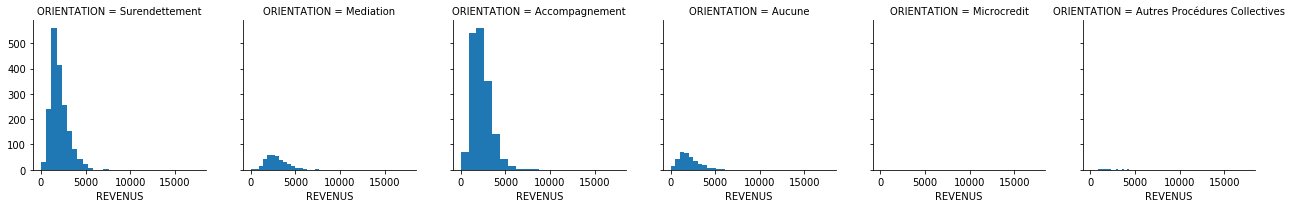

In [14]:
#je visualise une analyse simple qui permet de confirmer mon hypothèse
descision = sns.FacetGrid(train, col='ORIENTATION')
descision.map(plt.hist, 'REVENUS', bins=20)

In [15]:
train.age = train.age.astype('float')
test.age = train.age.astype('float')

In [16]:
train[['PROF','age']].groupby(['PROF'],as_index=False).median().sort_values(by='age', ascending=False)

,PROF,age
7,retraité,68.0
2,cadrefonctionnaire,53.0
0,autre,52.0
6,pro,51.0
5,fonctionnaire,48.0
1,cadre,47.0
3,chomeur,45.0
4,employé,45.0


In [17]:
train.isin(['TOM']).any()

PLATEFORME          False
month               False
region              False
ORIENTATION         False
NATURE_DIFF         False
age                 False
situation           False
adulte_foyer        False
PROF                False
LOGEMENT            False
REVENUS             False
cat_rev             False
CHARGES             False
cat_charges         False
CREDITS             False
cat_credit          False
RAV_ouverture       False
nb_credits          False
nb_amort            False
crd_amort           False
nb_renouv           False
crd_renouv          False
nb_decouvert        False
cat_moy_eco_jour    False
dtype: bool

In [18]:
def age(colonnes):
    PROF= colonnes[1]
    Age = colonnes[0]
    if pd.isnull(Age):
        if PROF== 'autres':
            return 52
        elif PROF == 'cadre':
            return 47
        elif PROF == 'cadrefonctionnaire':
            return 53
        elif PROF == 'chomeur':
            return 45
        elif PROF == 'employé':
            return 45
        elif PROF == 'fonctionnaire':
            return 48
        elif PROF == 'pro':
            return 51
        elif PROF == 'retraité':
            return 68
    return Age
    
train['age'] = train[['age', 'PROF']].apply(age, axis=1)
test['age'] = test[['age', 'PROF']].apply(age, axis=1)

In [19]:
"""def revenue(col):
    situation = col[0]
    REVENUS = col[1]
    if pd.isnull(REVENUS):
        if situation == 0:
            return 2700
        elif situation == 1:
            return 1500
        elif situation == 2:
            return 2150
        elif situation == 3:
            return 2270
        elif situation == 4:
            return 1673
        elif situation == 5:
            return 2806
    return REVENUS
train['REVENUS'] = train[['REVENUS', 'situation']].apply(revenue, axis=1)
test['REVENUS'] = test[['REVENUS', 'situation']].apply(revenue, axis=1)"""

"def revenue(col):\n    situation = col[0]\n    REVENUS = col[1]\n    if pd.isnull(REVENUS):\n        if situation == 0:\n            return 2700\n        elif situation == 1:\n            return 1500\n        elif situation == 2:\n            return 2150\n        elif situation == 3:\n            return 2270\n        elif situation == 4:\n            return 1673\n        elif situation == 5:\n            return 2806\n    return REVENUS\ntrain['REVENUS'] = train[['REVENUS', 'situation']].apply(revenue, axis=1)\ntest['REVENUS'] = test[['REVENUS', 'situation']].apply(revenue, axis=1)"

In [20]:
# Logistic Regression
"""X_train = train[['age', 'region', 'NATURE_DIFF',
        'situation', 'adulte_foyer', 'LOGEMENT',
       'REVENUS', 'cat_rev', 'CHARGES', 'cat_charges', 'CREDITS', 'cat_credit',
       'RAV_ouverture', 'nb_credits', 'nb_amort', 'crd_amort',
       'nb_renouv', 'crd_renouv']]"""
X_train = train[['age', 'month','region','situation', 'LOGEMENT','cat_moy_eco_jour','REVENUS','RAV_ouverture', 
       'nb_renouv','nb_amort', 'nb_decouvert']]
Y_train = train["ORIENTATION"]

In [21]:
X_train.fillna(X_train.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
#X_train.fillna(X_train.mean(), inplace=True)
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
clf.predict(X_train)
clf.score(X_train, Y_train)

/home/arianfar/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5554780181437544

- essai n° 1 : 0.46522447080716445
- essai n° 2 : 0.5515236101418934
- essai n° 3 : 0.5554780181437544

## OBJECTIF > 0.6
notre objectif est d'améliorer cet score et aussi utiliser d'autre technique

In [23]:
train['ORIENTATION'] = train['ORIENTATION'].replace(['Surendettement','Accompagnement','Mediation','Aucune','Autres Procédures Collectives','Microcredit'],[0,1,2,3,4,5])

In [24]:
X_train = train[['age', 'month','region','situation', 'LOGEMENT','cat_moy_eco_jour','REVENUS','RAV_ouverture', 
       'nb_renouv','nb_amort', 'nb_decouvert']]
Y_train = train["ORIENTATION"]

In [25]:
X_train.fillna(X_train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)
#test[test.eq('TOM').any(1)]
test['region'] = test['region'].replace(['TOM'], [0])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [31]:
randomF = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
randomF.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [32]:
X_test = test[['age', 'month','region','situation', 'LOGEMENT','cat_moy_eco_jour','REVENUS','RAV_ouverture', 
       'nb_renouv','nb_amort', 'nb_decouvert']]

In [33]:
y_pred = clf.predict(X_train)
y_pred

array(['Surendettement', 'Surendettement', 'Accompagnement', ...,
       'Surendettement', 'Surendettement', 'Surendettement'], dtype=object)

In [34]:
rF = round(randomF.score(X_train, Y_train) * 100, 2)
rF

80.6

- essai n° 1 : score = 80.6 (avec 10 arbres)
- essai n° 2 : score = 

In [30]:
#train.LOGEMENT.value_counts()
# Trouver une valeur de dataset
#test['region'] = test['region'].replace(['TOM'], [0])
#X_train[(X_train.values.ravel() == '53735,48').reshape(X_train.shape).any(1)]